In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("data\preprocessed_data.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,Winter,3.1,Yes,Express,14,Venmo,Fortnightly
1,2,19.0,Male,Sweater,Clothing,64.0,Maine,Winter,3.1,Yes,Express,2,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,73.0,Massachusetts,Spring,3.1,Yes,Free Shipping,23,Credit Card,Weekly
3,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,Spring,3.5,Yes,Next Day Air,49,PayPal,Weekly
4,5,45.0,Male,Blouse,Clothing,49.0,Oregon,Spring,2.7,Yes,Free Shipping,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40.0,Female,Hoodie,Clothing,28.0,Virginia,Summer,4.2,No,2-Day Shipping,32,Venmo,Weekly
3896,3897,52.0,Female,Backpack,Accessories,49.0,Iowa,Spring,4.5,No,Store Pickup,41,Bank Transfer,Bi-Weekly
3897,3898,46.0,Female,Belt,Accessories,33.0,New Jersey,Spring,2.9,No,Standard,24,Venmo,Quarterly
3898,3899,44.0,Female,Shoes,Footwear,77.0,Minnesota,Summer,3.8,No,Express,24,Venmo,Weekly


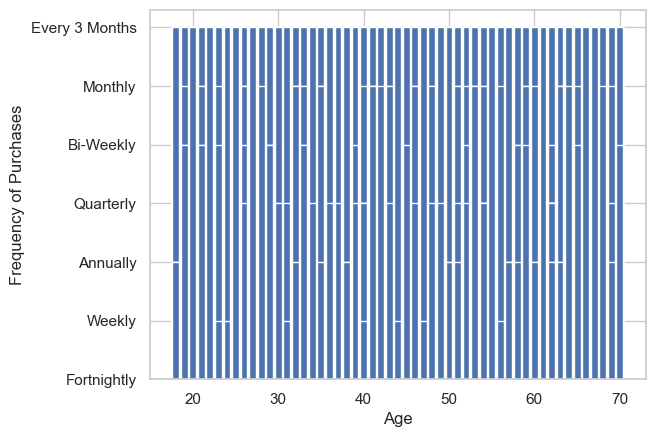

In [18]:
plt.bar(df['Age'], df['Frequency of Purchases'])
plt.xlabel('Age')
plt.ylabel('Frequency of Purchases')
plt.show()

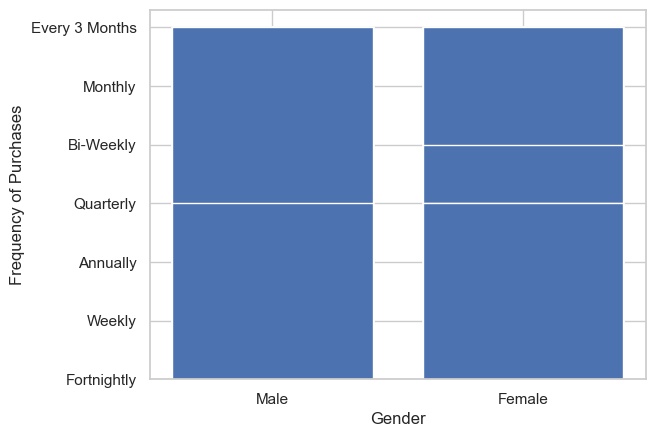

In [16]:
plt.bar(df['Gender'], df['Frequency of Purchases'])
plt.xlabel('Gender')
plt.ylabel('Frequency of Purchases')
plt.show()

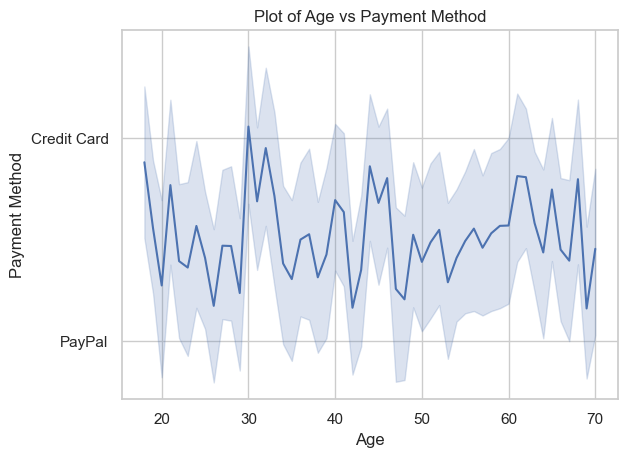

In [19]:
sns.lineplot(x='Age', y='Payment Method', data=df)
plt.xlabel('Age')
plt.ylabel('Payment Method')
plt.title('Plot of Age vs Payment Method')
plt.show()

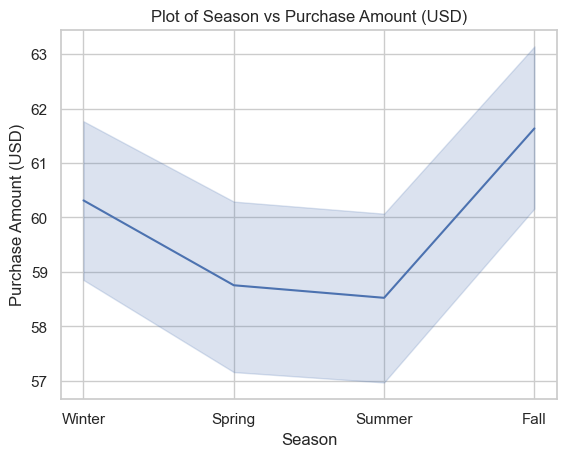

In [21]:
sns.set_theme(style="whitegrid")
sns.lineplot(x='Season', y='Purchase Amount (USD)', data=df)
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.title('Plot of Season vs Purchase Amount (USD)')
plt.show()

<Axes: xlabel='Payment Method', ylabel='Count'>

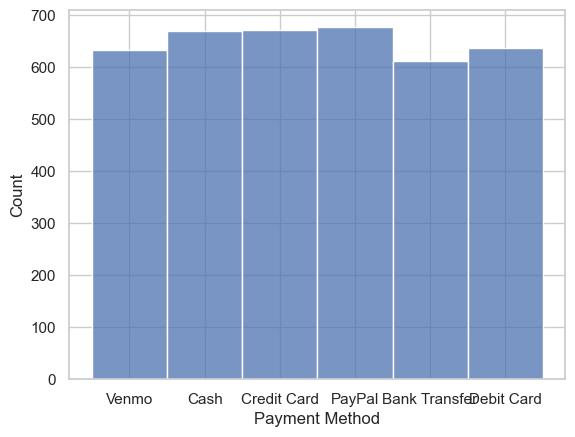

In [25]:
sns.histplot(data=df, x="Payment Method")

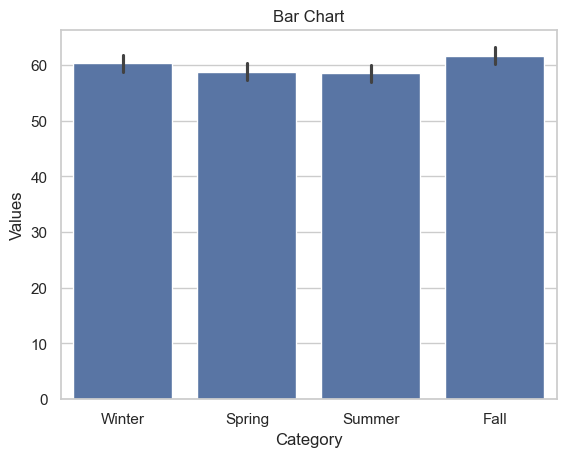

In [27]:
sns.barplot(data=df, x="Season", y="Purchase Amount (USD)")
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Chart')
plt.show()

In [31]:
age_bins = [0, 25, 35, 45, 55, 65, 75, 100]  # Define age bins
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+'] 

df['Age_Group']=pd.cut(df['Age'], bins=age_bins, labels=age_labels)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases,Age_Group
0,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,Winter,3.1,Yes,Express,14,Venmo,Fortnightly,46-55
1,2,19.0,Male,Sweater,Clothing,64.0,Maine,Winter,3.1,Yes,Express,2,Cash,Fortnightly,18-25
2,3,50.0,Male,Jeans,Clothing,73.0,Massachusetts,Spring,3.1,Yes,Free Shipping,23,Credit Card,Weekly,46-55
3,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,Spring,3.5,Yes,Next Day Air,49,PayPal,Weekly,18-25
4,5,45.0,Male,Blouse,Clothing,49.0,Oregon,Spring,2.7,Yes,Free Shipping,31,PayPal,Annually,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40.0,Female,Hoodie,Clothing,28.0,Virginia,Summer,4.2,No,2-Day Shipping,32,Venmo,Weekly,36-45
3896,3897,52.0,Female,Backpack,Accessories,49.0,Iowa,Spring,4.5,No,Store Pickup,41,Bank Transfer,Bi-Weekly,46-55
3897,3898,46.0,Female,Belt,Accessories,33.0,New Jersey,Spring,2.9,No,Standard,24,Venmo,Quarterly,46-55
3898,3899,44.0,Female,Shoes,Footwear,77.0,Minnesota,Summer,3.8,No,Express,24,Venmo,Weekly,36-45


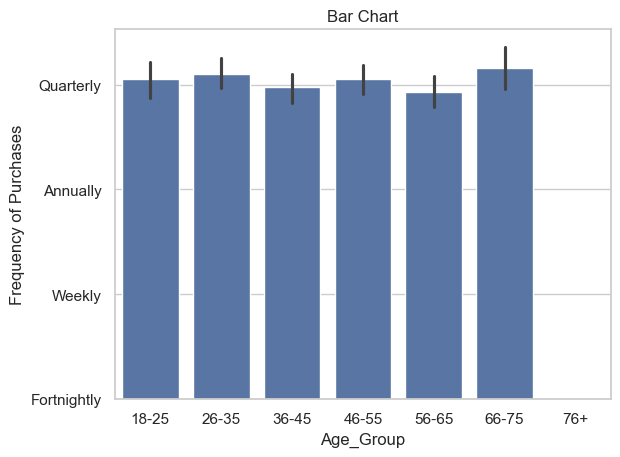

In [38]:
sns.barplot(data=df, x="Age_Group", y="Frequency of Purchases")
plt.xlabel('Age_Group')
plt.ylabel('Frequency of Purchases')
plt.title('Bar Chart')
plt.gca().invert_yaxis()
plt.show()

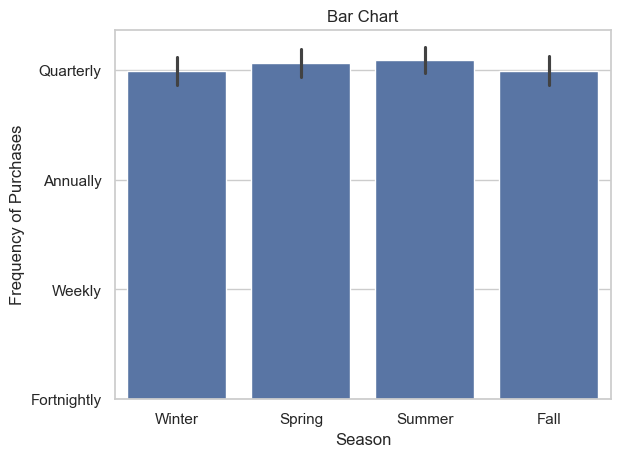

In [39]:
sns.barplot(data=df, x="Season", y="Frequency of Purchases")
plt.xlabel('Season')
plt.ylabel('Frequency of Purchases')
plt.title('Bar Chart')
plt.gca().invert_yaxis()
plt.show()

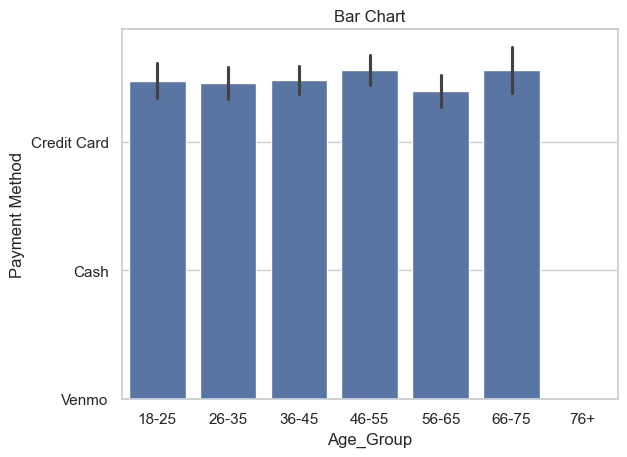

In [40]:
sns.barplot(data=df, x="Age_Group", y="Payment Method")
plt.xlabel('Age_Group')
plt.ylabel('Payment Method')
plt.title('Bar Chart')
plt.gca().invert_yaxis()
plt.show()

ValueError: Unable to parse string "Male" at position 7800

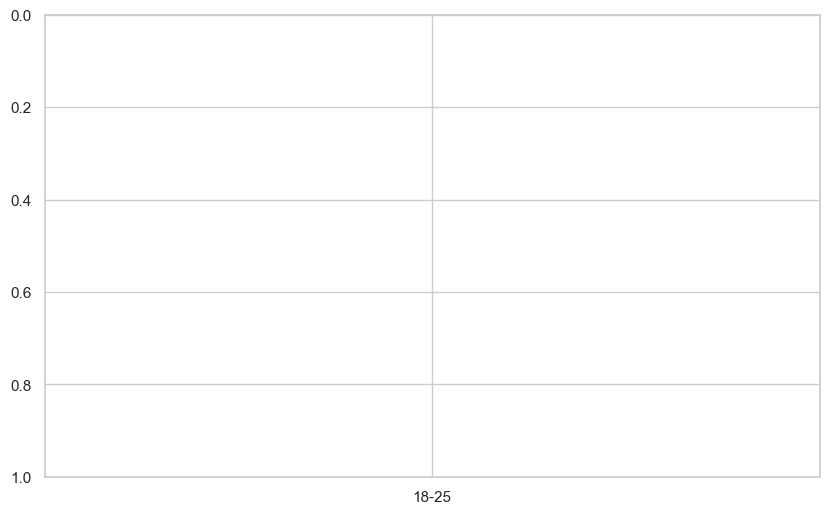

In [42]:
df_melted = df.melt(id_vars='Age_Group', var_name='Payment Method', value_name='Count')

# Plotting a stacked bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Count', hue='Payment Method', data=df_melted, palette='Set3')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Payment Methods by Age Group')
plt.legend(title='Payment Method', loc='upper right')
plt.show()